In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


In [12]:
%matplotlib inline

# Load the  dataset
df = pd.read_csv('cleaned_census.csv')
df.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
0  0.034201       1.128753      0.142888      -0.21878       -0.078120   
1  0.866417       1.128753     -0.146733      -0.21878       -2.326738   
2 -0.041455      -0.438122     -0.146733      -0.21878       -0.078120   
3  1.093385      -1.221559     -0.146733      -0.21878       -0.078120   
4 -0.798015       1.128753     -0.146733      -0.21878       -0.078120   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                     0.0                   0.0                 0.0   
1                     0.0                   0.0                 0.0   
2                     0.0                   0.0                 1.0   
3                     0.0                   0.0                 1.0   
4                     0.0                   0.0                 1.0   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                      0.0                          0.0  ...   
1                      0.0                          1.0  ...   
2                      0.0                          0.0  ...   
3                      0.0                          0.0  ...   
4                      0.0                          0.0  ...   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                    0.0                     0.0                       0.0   
1                    0.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     0.0                       0.0   
4                    0.0                     0.0                       0.0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                              0.0                            1.0   
1                              0.0                            1.0   
2                              0.0                            1.0   
3                              0.0                            1.0   
4                              0.0                            0.0   

   native-country_ Vietnam  native-country_ Yugoslavia  donate  
0                      0.0                         0.0       0  
1                      0.0                         0.0       0  
2                      0.0                         0.0       0  
3                      0.0                         0.0       0  
4                      0.0                         0.0       0  

[5 rows x 104 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Columns: 104 entries, age to donate
dtypes: float64(103), int64(1)
memory usage: 35.9 MB


In [9]:
df.describe()

age  education-num  capital-gain  capital-loss  \
count  4.522200e+04   4.522200e+04  4.522200e+04  4.522200e+04   
mean  -3.016766e-17   1.983681e-16 -3.299588e-18  1.075509e-16   
std    1.000011e+00   1.000011e+00  1.000011e+00  1.000011e+00   
min   -1.630231e+00  -3.571870e+00 -1.467332e-01 -2.187803e-01   
25%   -7.980149e-01  -4.381216e-01 -1.467332e-01 -2.187803e-01   
50%   -1.171110e-01  -4.640300e-02 -1.467332e-01 -2.187803e-01   
75%    6.394489e-01   1.128753e+00 -1.467332e-01 -2.187803e-01   
max    3.892656e+00   2.303909e+00  1.317519e+01  1.053806e+01   

       hours-per-week  workclass_ Federal-gov  workclass_ Local-gov  \
count    4.522200e+04            45222.000000          45222.000000   
mean     2.120378e-16                0.031091              0.068551   
std      1.000011e+00                0.173566              0.252691   
min     -3.326124e+00                0.000000              0.000000   
25%     -7.812006e-02                0.000000              0.000000   
50%     -7.812006e-02                0.000000              0.000000   
75%      3.382907e-01                0.000000              0.000000   
max      4.835527e+00                1.000000              1.000000   

       workclass_ Private  workclass_ Self-emp-inc  \
count        45222.000000             45222.000000   
mean             0.736522                 0.036398   
std              0.440524                 0.187281   
min              0.000000                 0.000000   
25%              0.000000                 0.000000   
50%              1.000000                 0.000000   
75%              1.000000                 0.000000   
max              1.000000                 1.000000   

       workclass_ Self-emp-not-inc  ...  native-country_ Puerto-Rico  \
count                 45222.000000  ...                 45222.000000   
mean                      0.083941  ...                     0.003870   
std                       0.277303  ...                     0.062088   
min                       0.000000  ...                     0.000000   
25%                       0.000000  ...                     0.000000   
50%                       0.000000  ...                     0.000000   
75%                       0.000000  ...                     0.000000   
max                       1.000000  ...                     1.000000   

       native-country_ Scotland  native-country_ South  \
count              45222.000000           45222.000000   
mean                   0.000442               0.002233   
std                    0.021026               0.047207   
min                    0.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                    0.000000               0.000000   
max                    1.000000               1.000000   

       native-country_ Taiwan  native-country_ Thailand  \
count            45222.000000              45222.000000   
mean                 0.001216                  0.000641   
std                  0.034854                  0.025316   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  0.000000                  0.000000   
max                  1.000000                  1.000000   

       native-country_ Trinadad&Tobago  native-country_ United-States  \
count                     45222.000000                   45222.000000   
mean                          0.000575                       0.913095   
std                           0.023971                       0.281698   
min                           0.000000                       0.000000   
25%                           0.000000                       1.000000   
50%                           0.000000                       1.000000   
75%                           0.000000                       1.000000   
max   

In [13]:
# Define feature columns and target variable
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']



1. Target Distribution Plot

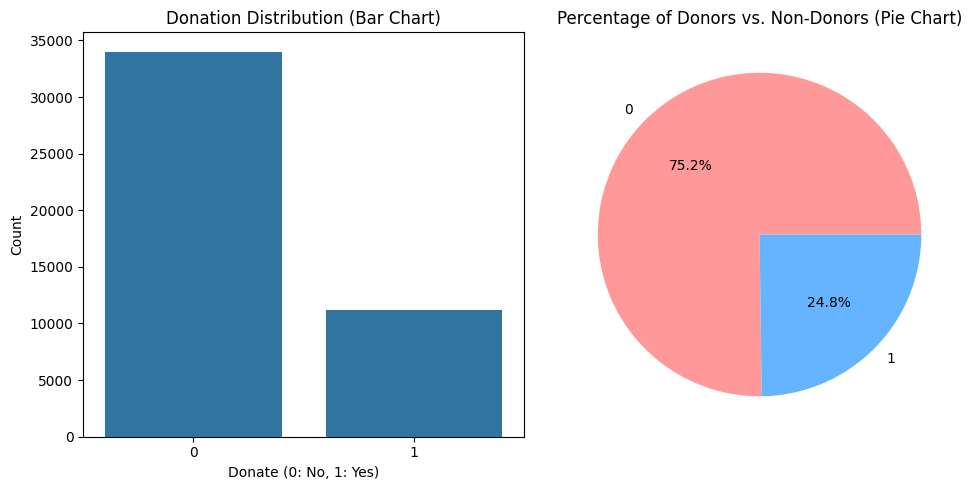

In [14]:
def plot_target_distribution(df):
    plt.figure(figsize=(10, 5))
    
    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x='donate', data=df)
    plt.title('Donation Distribution (Bar Chart)')
    plt.xlabel('Donate (0: No, 1: Yes)')
    plt.ylabel('Count')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    df['donate'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    plt.title('Percentage of Donors vs. Non-Donors (Pie Chart)')
    plt.ylabel('')  # Remove ylabel for pie chart
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_target_distribution(df)

2. Boxplots for Key Numerical Features

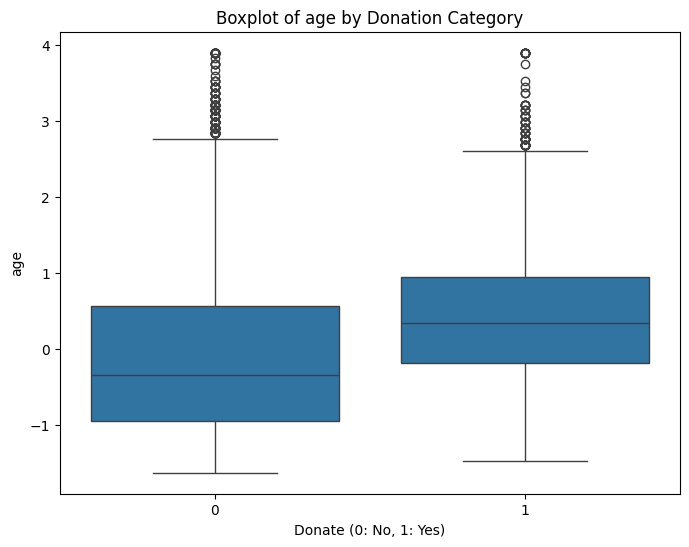

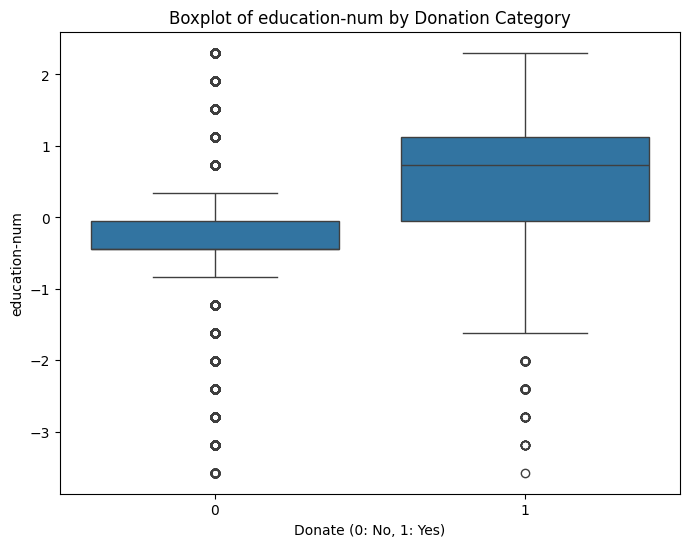

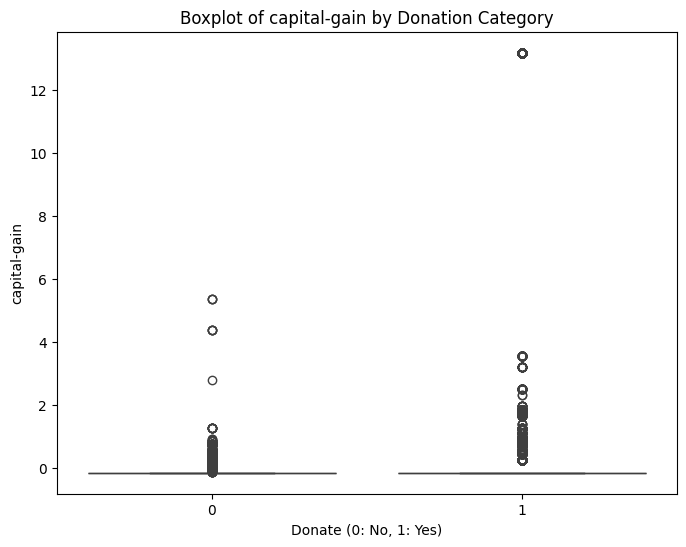

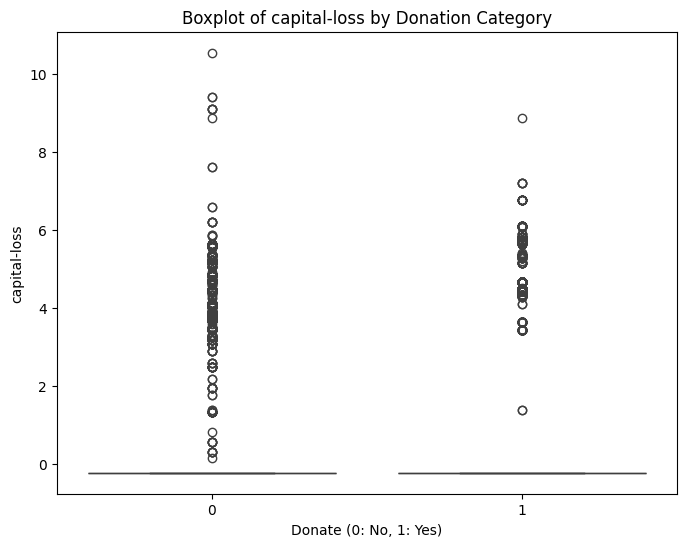

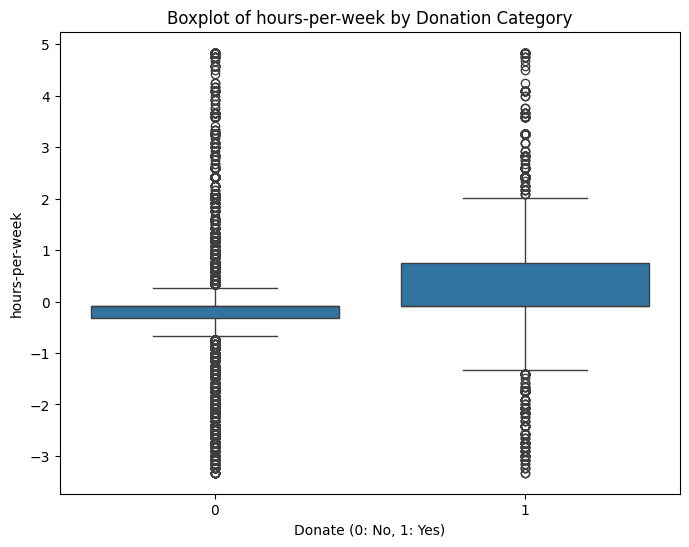

In [15]:
def plot_boxplots(df):
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='donate', y=feature, data=df)
        plt.title(f'Boxplot of {feature} by Donation Category')
        plt.xlabel('Donate (0: No, 1: Yes)')
        plt.ylabel(feature)
        plt.show()

# Call the function
plot_boxplots(df)

3. Correlation Heatmap

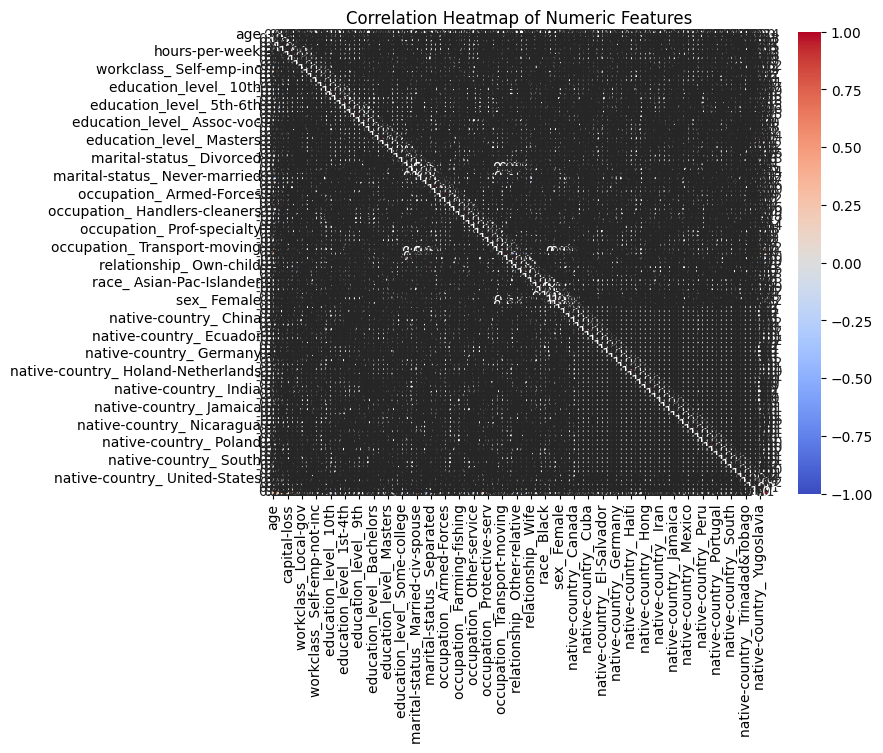

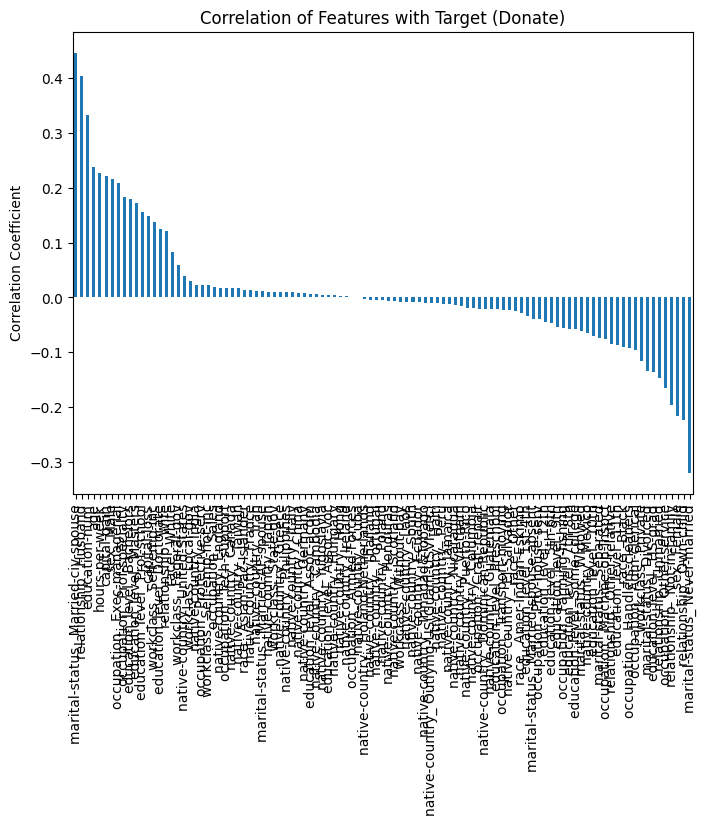

In [17]:
def plot_correlation_heatmap(df):
    # Select numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])  # This includes one-hot encoded binaries if they are numeric
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
    
    # Optional: Bar chart of correlations with the target
    correlations_with_target = corr_matrix['donate'].sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    correlations_with_target.drop('donate').plot(kind='bar')
    plt.title('Correlation of Features with Target (Donate)')
    plt.ylabel('Correlation Coefficient')
    plt.show()

# Call the function
plot_correlation_heatmap(df)

4. Feature Importance Chart

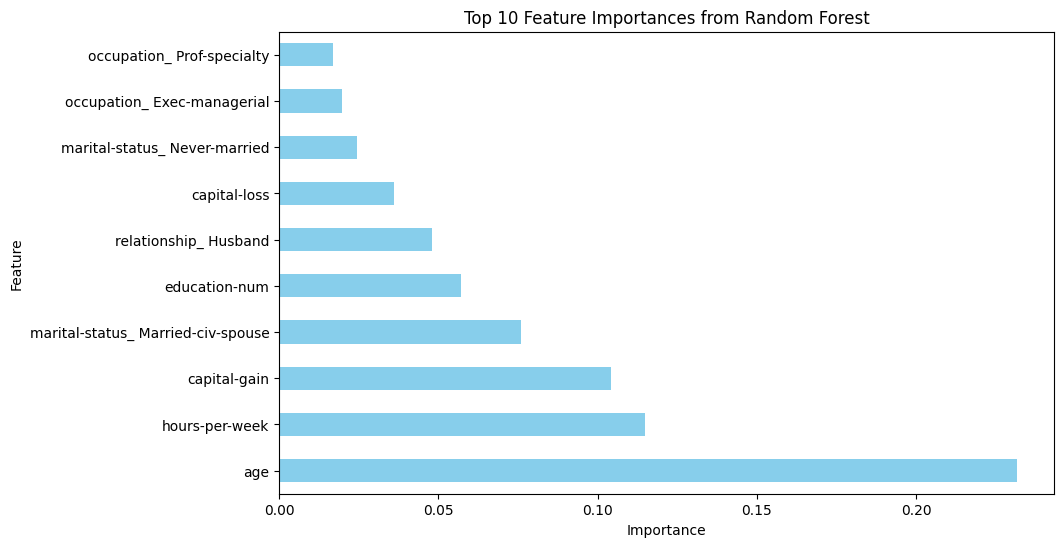

In [18]:
def plot_feature_importance(df):
    X = df.drop('donate', axis=1)  # All features except target
    y = df['donate']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Get feature importances
    importances = rf_model.feature_importances_
    feature_names = X.columns
    feat_importances = pd.Series(importances, index=feature_names).nlargest(10)
    
    plt.figure(figsize=(10, 6))
    feat_importances.plot(kind='barh', color='skyblue')
    plt.title('Top 10 Feature Importances from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Call the function
plot_feature_importance(df)

5. Pairplot or Scatter Matrix

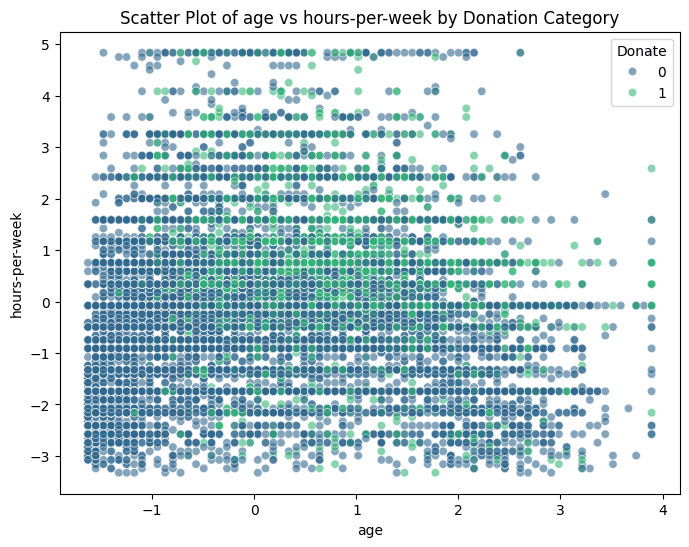

In [20]:

def plot_scatter(df, x_col, y_col):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='donate', palette='viridis', alpha=0.6)
    plt.title(f'Scatter Plot of {x_col} vs {y_col} by Donation Category')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Donate')
    plt.show()

# Example call:
plot_scatter(df, 'age', 'hours-per-week')

6. PCA Visualization

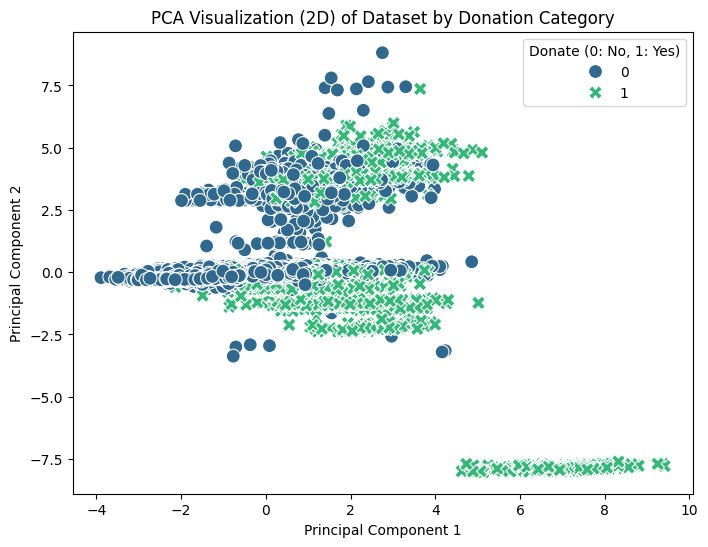

In [21]:
def plot_pca(df):
    # Use numerical features for PCA (you could include one-hot encoded features if desired)
    X = df[numerical_features]
    y = df['donate']
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y, s=100)
    plt.title('PCA Visualization (2D) of Dataset by Donation Category')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Donate (0: No, 1: Yes)')
    plt.show()

# Call the function
plot_pca(df)

7.Bar Charts for Categorical Features:

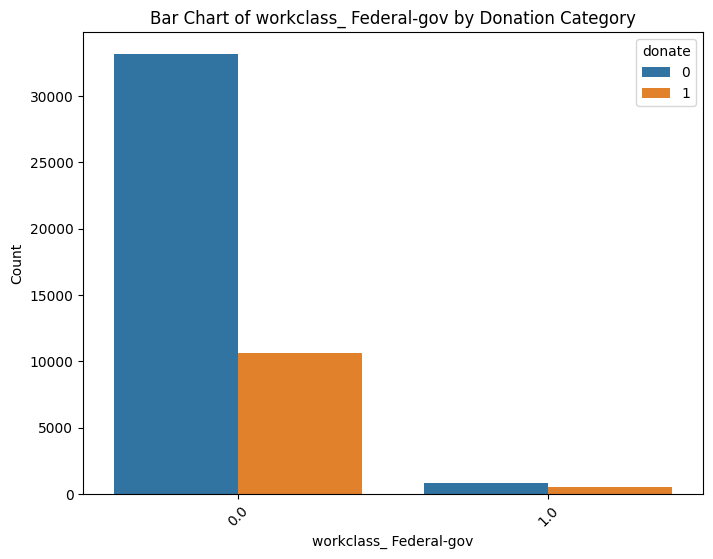

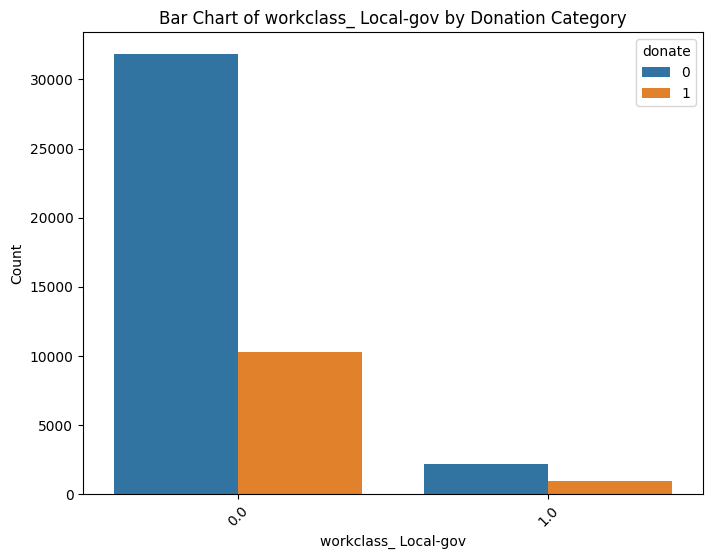

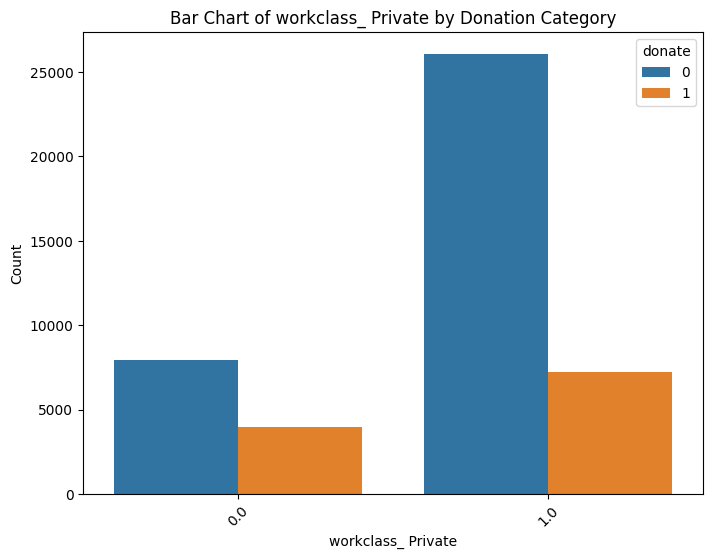

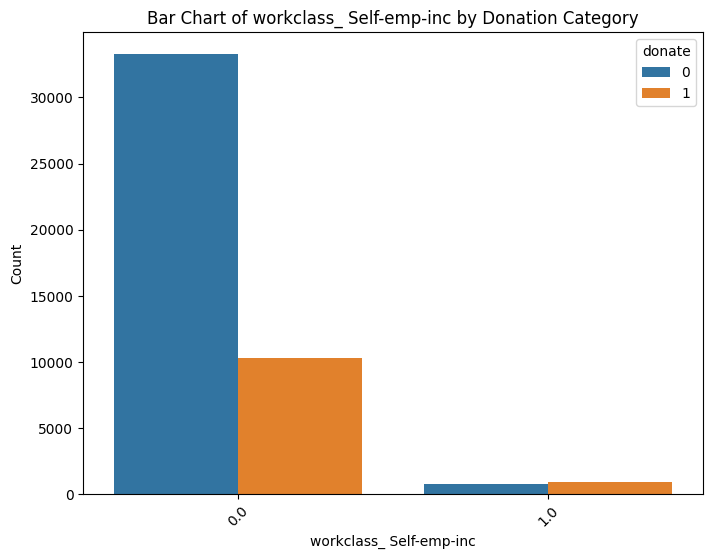

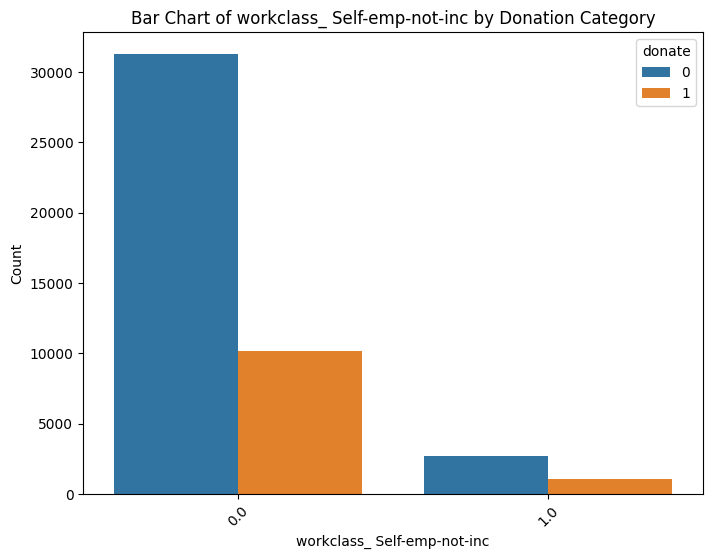

In [22]:
def plot_bar_charts_for_categorical(df):
    categorical_features = [col for col in df.columns if col.startswith('workclass_') or col.startswith('native-country_')]
    
    for feature in categorical_features[:5]:  # Limit to first 5 for brevity
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue='donate', data=df)
        plt.title(f'Bar Chart of {feature} by Donation Category')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Call the function
plot_bar_charts_for_categorical(df)

8.Histograms for Numerical Features

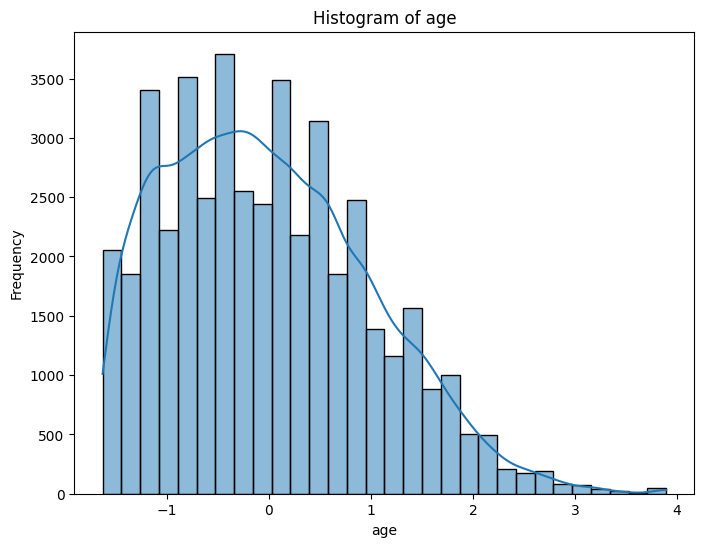

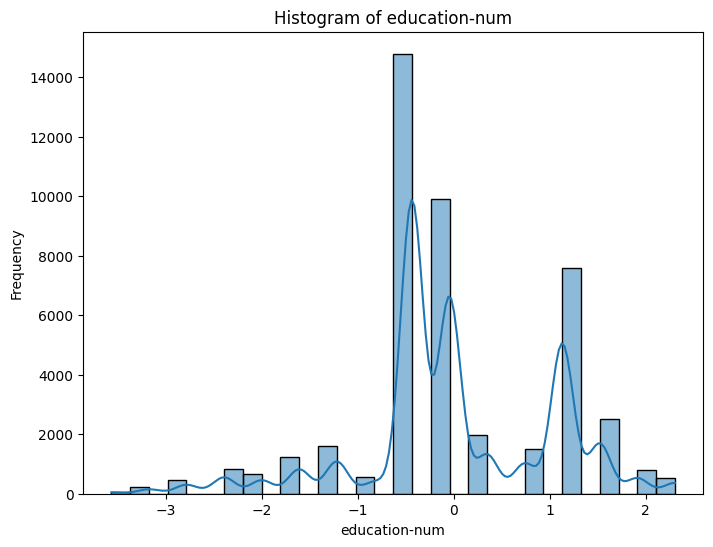

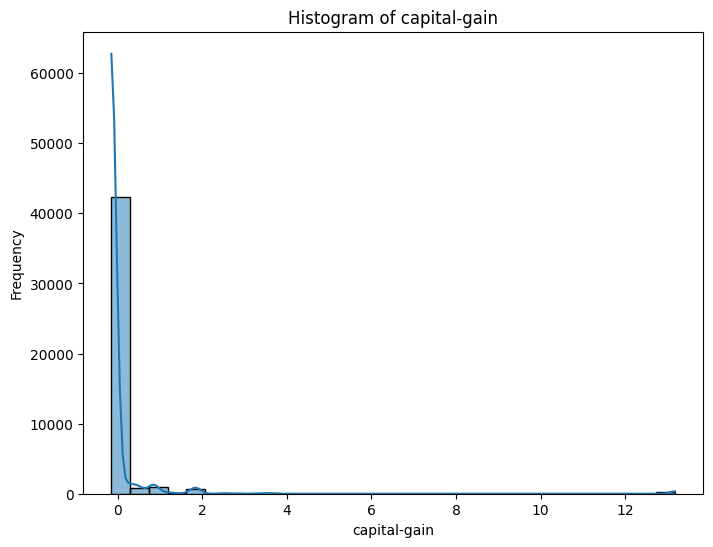

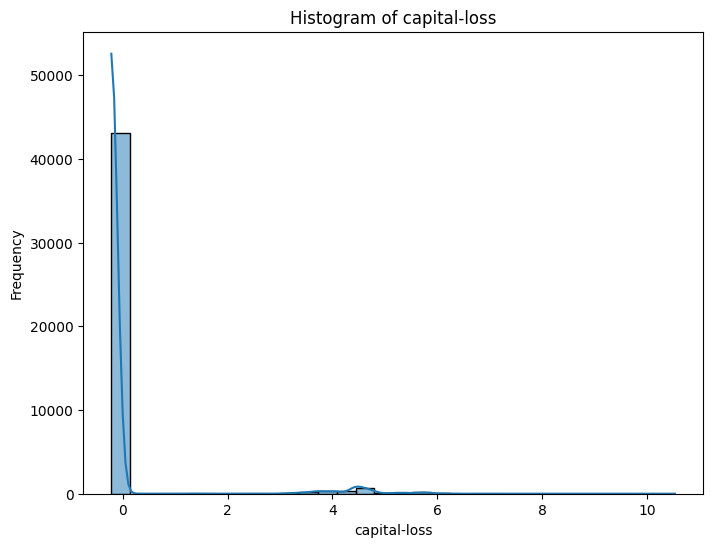

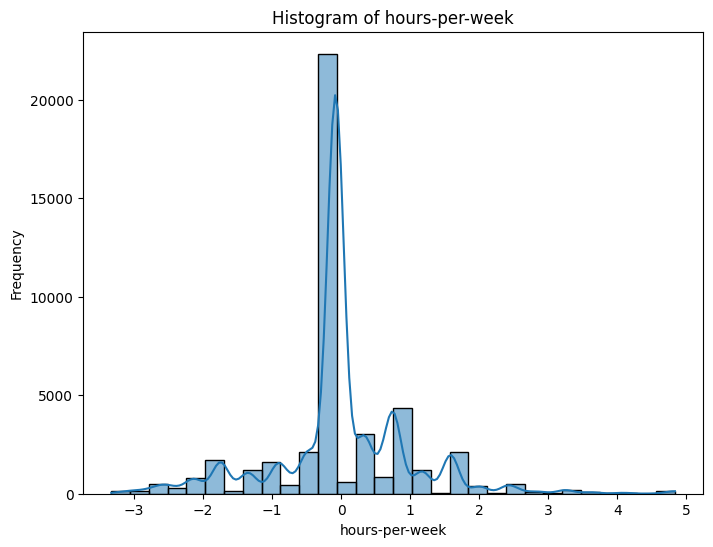

In [23]:
def plot_histograms(df):
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Call the function
plot_histograms(df)

8.Violin Plots

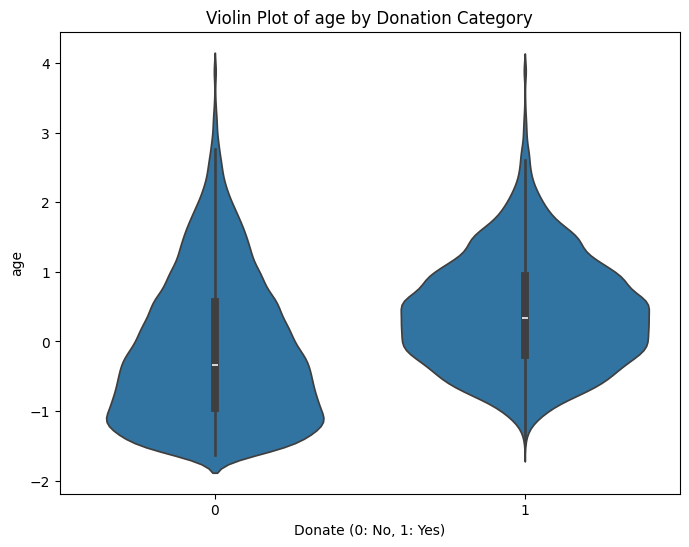

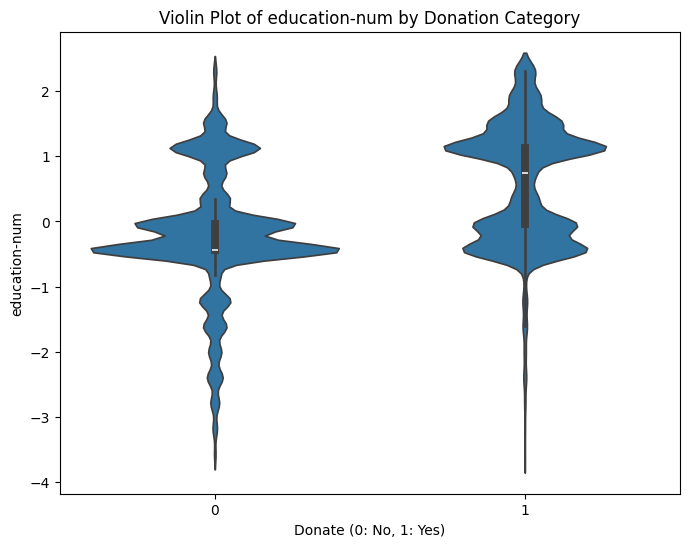

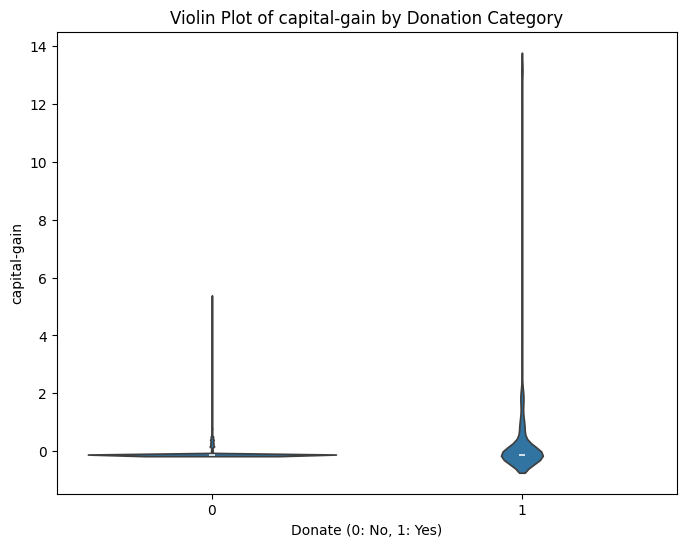

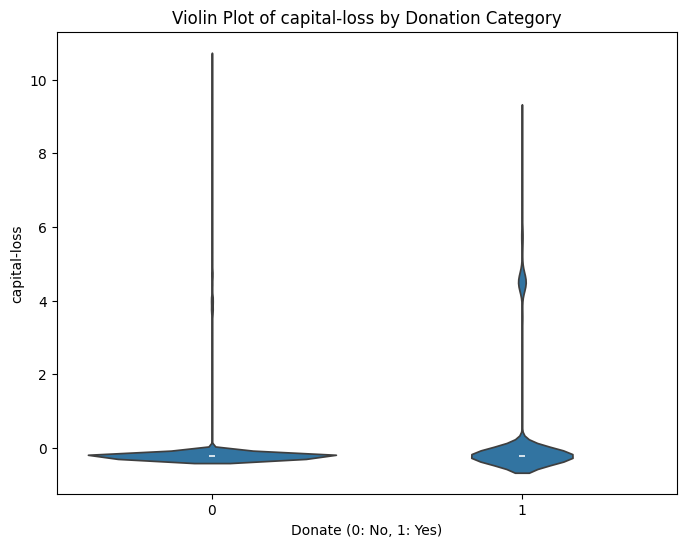

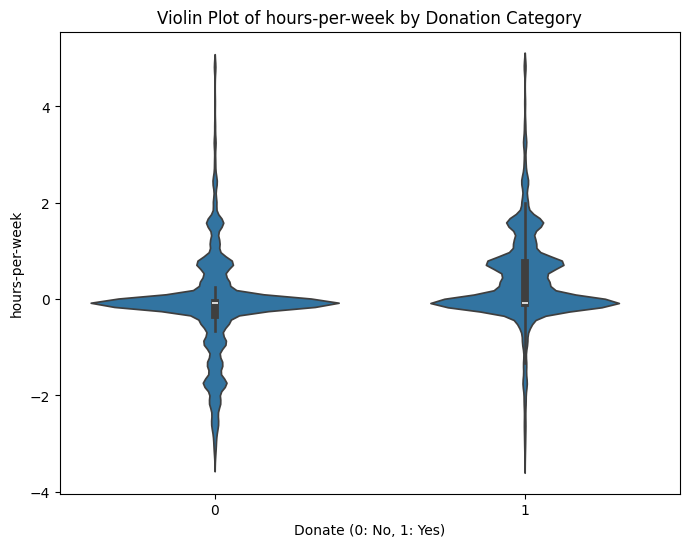

In [24]:
def plot_violin_plots(df):
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='donate', y=feature, data=df)
        plt.title(f'Violin Plot of {feature} by Donation Category')
        plt.xlabel('Donate (0: No, 1: Yes)')
        plt.ylabel(feature)
        plt.show()

# Call the function
plot_violin_plots(df)

9.Model Performance Visualizations

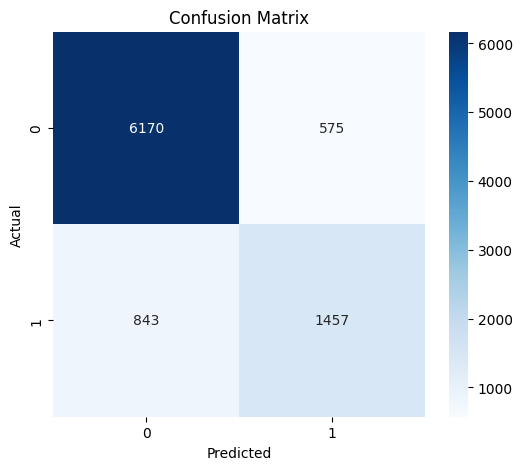

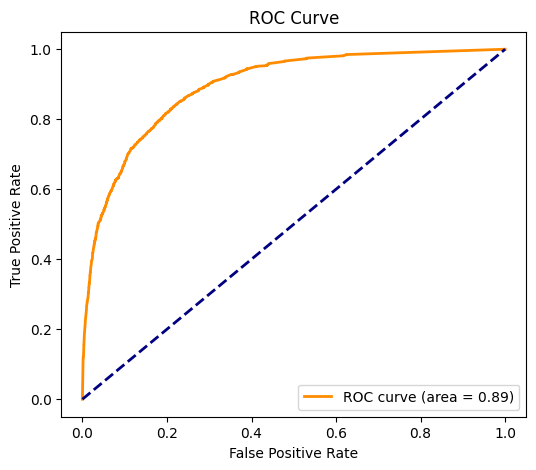

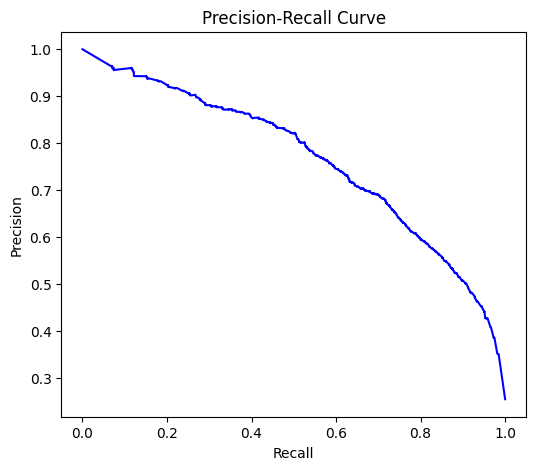

In [25]:
def plot_model_performance(df):
    X = df.drop('donate', axis=1)
    y = df['donate']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Call the function
plot_model_performance(df)